In [1]:
# Example: read a CSV file from your computer


from __future__ import absolute_import, print_function,division, unicode_literals
import os.path
import glob
import shutil

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import keras

import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [2]:
# ✅ Check TensorFlow version
assert tf.__version__.startswith('2')

# ✅ Path to your dataset folder
data_dir = r"C:\Users\haras\OneDrive\Desktop\AIT--rice_plant_disease_prediction_using-_images\rice_leaf_diseases"

# ✅ Use pathlib for consistency
data_dir = pathlib.Path(data_dir)

# ✅ Example: Count total images
image_count = len(list(data_dir.glob('*/*.jpg')))
print("Total images found:", image_count)


Total images found: 120


In [3]:
BATCH_SIZE = 8
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [4]:
data_dir = r"C:\Users\haras\OneDrive\Desktop\AIT--rice_plant_disease_prediction_using-_images\rice_leaf_diseases"

data_dir = pathlib.Path(data_dir)

CLASS_NAMES = np.array(['Leaf Blight','Brown Spot','Leaf Smut'])

print('Class Names: ', CLASS_NAMES)

Class Names:  ['Leaf Blight' 'Brown Spot' 'Leaf Smut']


In [5]:

train_path = r"C:\Users\haras\OneDrive\Desktop\AIT--rice_plant_disease_prediction_using-_images\rice_leaf_diseases"
test_path  = r"C:\Users\haras\OneDrive\Desktop\AIT--rice_plant_disease_prediction_using-_images\rice_leaf_diseases"


In [6]:
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

train_data_gen = image_train_gen.flow_from_directory(train_path,
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                     class_mode='sparse')

img_val_gen = ImageDataGenerator(rescale=1./255)
val_data_gen = img_val_gen.flow_from_directory(test_path,
                                               batch_size=BATCH_SIZE,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH),
                                               class_mode='sparse')

Found 120 images belonging to 3 classes.


Found 120 images belonging to 3 classes.


In [7]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

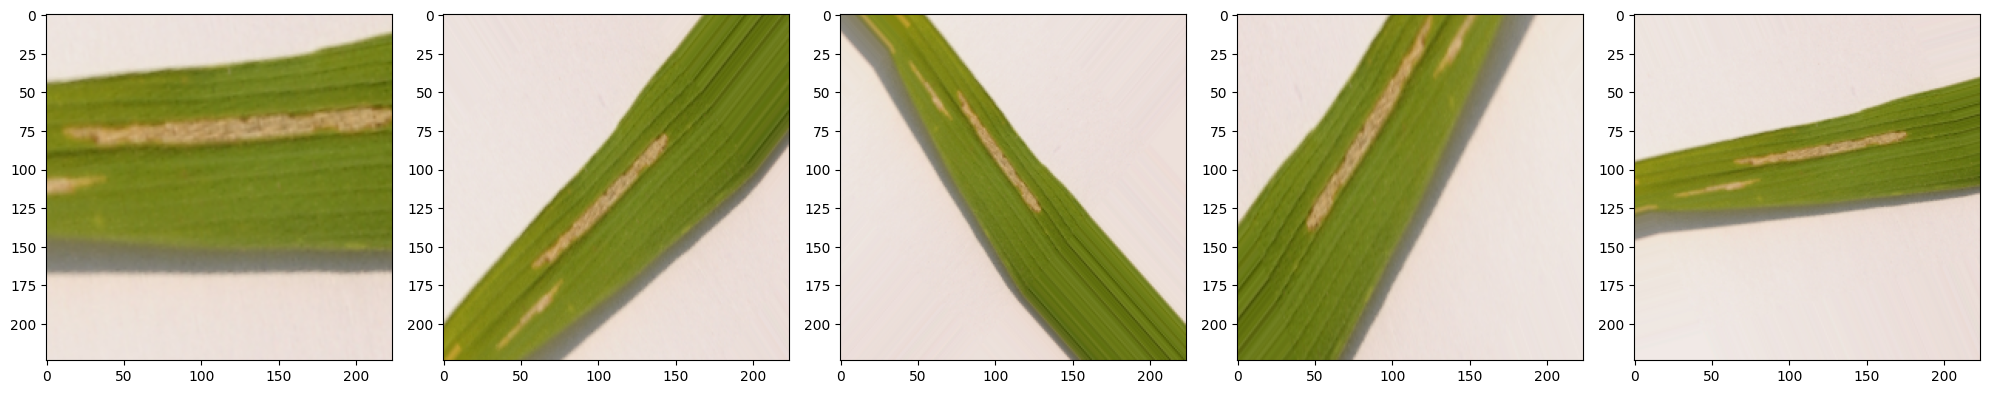

In [8]:
# Plot a few training images
img_array = [train_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

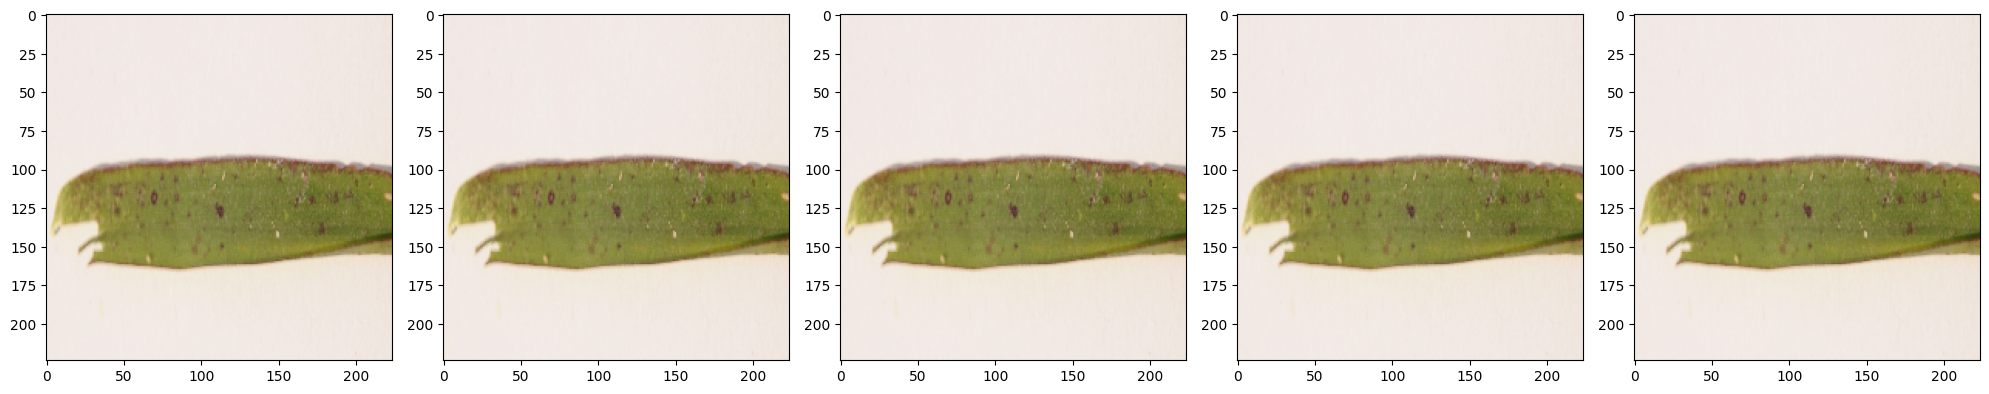

In [9]:
# plot a few val images
img_array  = [val_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

In [10]:
# Model building
#Instatiating A convnet

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.summary()


c:\Users\haras\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,537,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,561,891 (21.22 MB)

 Trainable params: 5,561,891 (21.22 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
EPOCHS = 40
history = model.fit(train_data_gen, epochs=EPOCHS, validation_data=val_data_gen)


c:\Users\haras\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 452ms/step - accuracy: 0.3417 - loss: 1.7477 - val_accuracy: 0.3333 - val_loss: 1.0993
Epoch 2/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step - accuracy: 0.3583 - loss: 1.0889 - val_accuracy: 0.4500 - val_loss: 1.0568
Epoch 3/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 308ms/step - accuracy: 0.4000 - loss: 1.0892 - val_accuracy: 0.5250 - val_loss: 1.0210
Epoch 4/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 316ms/step - accuracy: 0.4917 - loss: 0.9988 - val_accuracy: 0.5417 - val_loss: 1.0093
Epoch 5/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 288ms/step - accuracy: 0.4667 - loss: 1.0558 - val_accuracy: 0.5083 - val_loss: 0.9341
Epoch 6/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 292ms/step - accuracy: 0.5250 - loss: 0.9615 - val_accuracy: 0.7250 - val_loss: 0.7904
Epoch 7/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 293ms/step - accuracy: 0.5833 - loss: 0.9571 - val_accuracy: 0.7167 - val_loss: 0.7632
Epoch 8/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 286ms/step - accuracy: 0.6333 - loss: 0.8845 - val_accuracy: 0.

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
batch_size=BATCH_SIZE


In [14]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


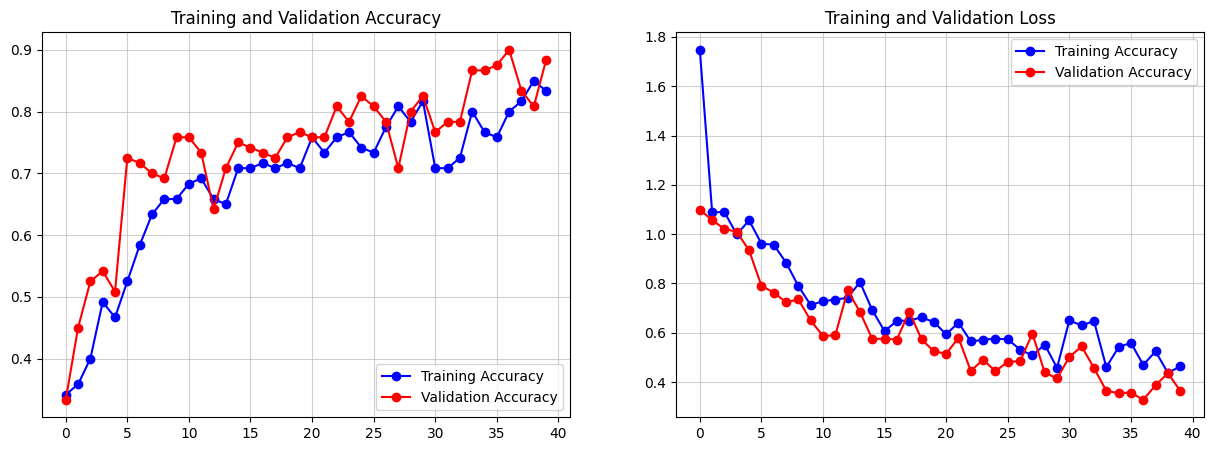

In [15]:
# Plot training and validation graphs
acc = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, 'b-o', label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, 'r-o', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True, linestyle='-', alpha=0.6)
plt.legend(loc='lower right')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, 'b-o', label='Training Accuracy')
plt.plot(epochs_range, val_loss, 'r-o', label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True, linestyle='-', alpha=0.6)
plt.legend(loc='upper right')


plt.show()

In [16]:
save_path = r"C:\Users\haras\Downloads\rice2modal.h5"

# Save the model
model.save(save_path)

# Load the model
model = tf.keras.models.load_model(save_path)


In [17]:
import tensorflow.keras as keras

model = keras.models.load_model(save_path)


First image to predict:

Actual label: Leaf Smut
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction: Leaf Smut


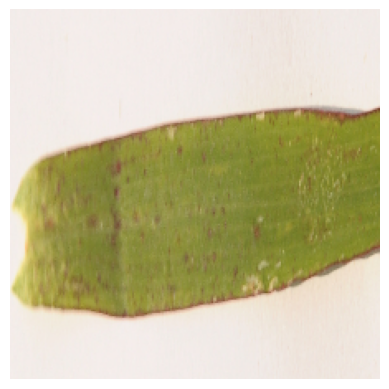

In [36]:
# make a prediction - 1 batch - from val_data_gen

for images_batch, labels_batch in val_data_gen:
    first_image = images_batch[0]
    first_label = int(labels_batch[0])  # convert from tensor to int

    print("First image to predict:")
    plt.imshow(first_image)
    plt.axis('off')

    # your class names
    class_names = ['Leaf Blight', 'Brown Spot', 'Leaf Smut']

    print("\nActual label:", class_names[first_label])

    # model is ready so call predict function 
    batch_prediction = model.predict(images_batch)
    predicted_label = np.argmax(batch_prediction[0])
    print("Prediction:", class_names[predicted_label])
    break  # only show first batch
